<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Install-Packages" data-toc-modified-id="Install-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install Packages</a></span></li><li><span><a href="#Import-files" data-toc-modified-id="Import-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import files</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Unique-Teams" data-toc-modified-id="Unique-Teams-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Unique Teams</a></span></li><li><span><a href="#Isolating-Home-Scores" data-toc-modified-id="Isolating-Home-Scores-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Isolating Home Scores</a></span></li><li><span><a href="#Isolating-Away-Scores" data-toc-modified-id="Isolating-Away-Scores-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Isolating Away Scores</a></span></li><li><span><a href="#Combine-Home-and-Away-scores-in-one-dataset" data-toc-modified-id="Combine-Home-and-Away-scores-in-one-dataset-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Combine Home and Away scores in one dataset</a></span></li><li><span><a href="#Converting-the-final-result-into-points" data-toc-modified-id="Converting-the-final-result-into-points-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Converting the final result into points</a></span></li><li><span><a href="#Aggregating-data-per-team-based-on-variables" data-toc-modified-id="Aggregating-data-per-team-based-on-variables-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Aggregating data per team based on variables</a></span></li><li><span><a href="#Creating-a-new-Dataframe-with-aggregated-scores-per-team-and-variables" data-toc-modified-id="Creating-a-new-Dataframe-with-aggregated-scores-per-team-and-variables-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Creating a new Dataframe with aggregated scores per team and variables</a></span></li></ul></li><li><span><a href="#KMean" data-toc-modified-id="KMean-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KMean</a></span><ul class="toc-item"><li><span><a href="#Tuning-the-alghorithm" data-toc-modified-id="Tuning-the-alghorithm-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tuning the alghorithm</a></span></li><li><span><a href="#Algorithm-Application" data-toc-modified-id="Algorithm-Application-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Algorithm Application</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Summary

This project aims to analyze the competitiveness of the Italian Teams of Serie A. To do so, and considering the type of data the dataset contains, an unsupervised algorithm (K-MEANS) is used to group similar teams in clusters based on their ten years of game performance. Looking at the Dataset, it is a collection of records for every game played in Italy from 2008 to 2018. There is also the bet value for several organizations that have been dropped because they are not useful for the purpose of this project. The research question is: considering the data related to all the matches played in this timeframe, what are the Clusters that can group similar teams using the K-Means algorithm? The aim is to group similar teams through a scientific method that, after all, could be used to distribute the "TV Rights" based on competitiveness and historical performances.

Most of the job in this study is related to "data preparation". The first challenge has been importing the data from ten different Excel files and merging them into one dataset. Another critical obstacle comes from the fact that each game and each row has data that simultaneously refer to two different teams. With that in mind, in the preprocessing phase, it has been necessary to extract, for each match, all the data referred to the Home Team and the Away Team. Then, the two groups of data were combined again. The last version can be summarized as follows: 
- 7594 rows representing all matches played as Home Team or Away Team.
- 16 columns representing the teams' attributes in terms of scores matured and suffered, such as the number of shots, corners, or goals.

Later, the attributes with negative meanings are converted from positive to negative. This is the case of Goals suffered or yellow and red cards. Then, the dataset has been reduced to 34 lines, one for each team that played at least one game in the Italian Serie A in the timeframe considered. This final raw version of the dataset represents the summary of 10 years of games played in the Italian Serie A. Once the data have been grouped per team, an unsupervised algorithm has been applied to identify similar groups of teams.


# Install Packages

In [1]:
install.packages("DataExplorer")
install.packages("lessR")
install.packages("factoextra") # Library required for fviz_cluster function
install.packages("useful")


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpIhFOnA\downloaded_packages


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lessR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpIhFOnA\downloaded_packages


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpIhFOnA\downloaded_packages


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'useful' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpIhFOnA\downloaded_packages


In [2]:
library(plyr)
library(tidyverse)
library(DataExplorer)
library(lessR)
library(factoextra)
library(useful)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

lessR 4.2.8                         feedback: 

# Import files


In [3]:
#set the working directory
setwd("C:\\Users\\anton\\Desktop\\JupyterNotebook\\DATA_MINING_EXAM\\ItalianSerieA")

In [4]:
tbl = list.files(pattern="*.csv")
for (i in 1:length(tbl)) assign(tbl[i], read.csv(tbl[i]))
list_of_data = lapply(tbl, read.csv)
Dataset = do.call(rbind.fill, list_of_data)

In [5]:
head(Dataset)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,⋯,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I1,2009-08-22,Bologna,Fiorentina,1,1,D,1,0,H,⋯,2.57,2.38,1.60,1.54,NA,NA,NA,NA,NA,NA
2,I1,2009-08-22,Siena,Milan,1,2,A,1,1,D,⋯,1.91,1.85,2.08,2.02,NA,NA,NA,NA,NA,NA
3,I1,2009-08-23,Catania,Sampdoria,1,2,A,1,1,D,⋯,1.83,1.76,2.12,2.04,NA,NA,NA,NA,NA,NA
4,I1,2009-08-23,Genoa,Roma,3,2,H,0,0,D,⋯,1.75,1.67,2.30,2.13,NA,NA,NA,NA,NA,NA
5,I1,2009-08-23,Inter,Bari,1,1,D,0,0,D,⋯,1.84,1.79,2.15,2.05,NA,NA,NA,NA,NA,NA
6,I1,2009-08-23,Juventus,Chievo,1,0,H,1,0,H,⋯,2.03,1.96,1.92,1.88,NA,NA,NA,NA,NA,NA


# Data Exploration

Many attributes of this dataset refer to games bet values from several brands. Part of them are empty cells. Considering that these attributes are not part of this project's scope, these columns have been dropped.

In [6]:
introduce(Dataset)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
3805,76,6,70,0,36088,0,289180,2105424


In [7]:
str(Dataset)

'data.frame':	3805 obs. of  76 variables:
 $ Div       : chr  "I1" "I1" "I1" "I1" ...
 $ Date      : chr  "2009-08-22" "2009-08-22" "2009-08-23" "2009-08-23" ...
 $ HomeTeam  : chr  "Bologna" "Siena" "Catania" "Genoa" ...
 $ AwayTeam  : chr  "Fiorentina" "Milan" "Sampdoria" "Roma" ...
 $ FTHG      : int  1 1 1 3 1 1 1 0 2 2 ...
 $ FTAG      : int  1 2 2 2 1 0 0 0 1 2 ...
 $ FTR       : chr  "D" "A" "A" "H" ...
 $ HTHG      : int  1 1 1 0 0 1 1 0 1 1 ...
 $ HTAG      : int  0 1 1 0 0 0 0 0 0 1 ...
 $ HTR       : chr  "H" "D" "D" "D" ...
 $ HS        : int  6 15 8 14 20 14 12 21 9 14 ...
 $ AS        : int  17 13 8 11 13 6 15 10 15 13 ...
 $ HST       : int  4 4 4 7 3 2 3 5 4 6 ...
 $ AST       : int  5 5 4 6 4 0 4 3 4 5 ...
 $ HF        : int  17 22 29 20 20 15 21 16 20 15 ...
 $ AF        : int  20 11 13 13 14 14 17 13 10 19 ...
 $ HC        : int  4 5 11 8 10 9 3 4 4 7 ...
 $ AC        : int  9 8 4 5 1 2 9 5 10 3 ...
 $ HY        : int  1 2 4 5 3 3 3 1 4 3 ...
 $ AY        : int  1 1 

In [8]:
# removing all the columns related to Bet companies which are not relevant for the scope of this project
Dataset = subset(Dataset, select = -c(23:76) )

In [9]:
head(Dataset)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,⋯,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,I1,2009-08-22,Bologna,Fiorentina,1,1,D,1,0,H,⋯,4,5,17,20,4,9,1,1,0,0
2,I1,2009-08-22,Siena,Milan,1,2,A,1,1,D,⋯,4,5,22,11,5,8,2,1,0,0
3,I1,2009-08-23,Catania,Sampdoria,1,2,A,1,1,D,⋯,4,4,29,13,11,4,4,2,1,0
4,I1,2009-08-23,Genoa,Roma,3,2,H,0,0,D,⋯,7,6,20,13,8,5,5,2,0,0
5,I1,2009-08-23,Inter,Bari,1,1,D,0,0,D,⋯,3,4,20,14,10,1,3,2,0,0
6,I1,2009-08-23,Juventus,Chievo,1,0,H,1,0,H,⋯,2,0,15,14,9,2,3,2,0,0


In [10]:
#looking for missing values
sum(!complete.cases(Dataset))

[1] 8

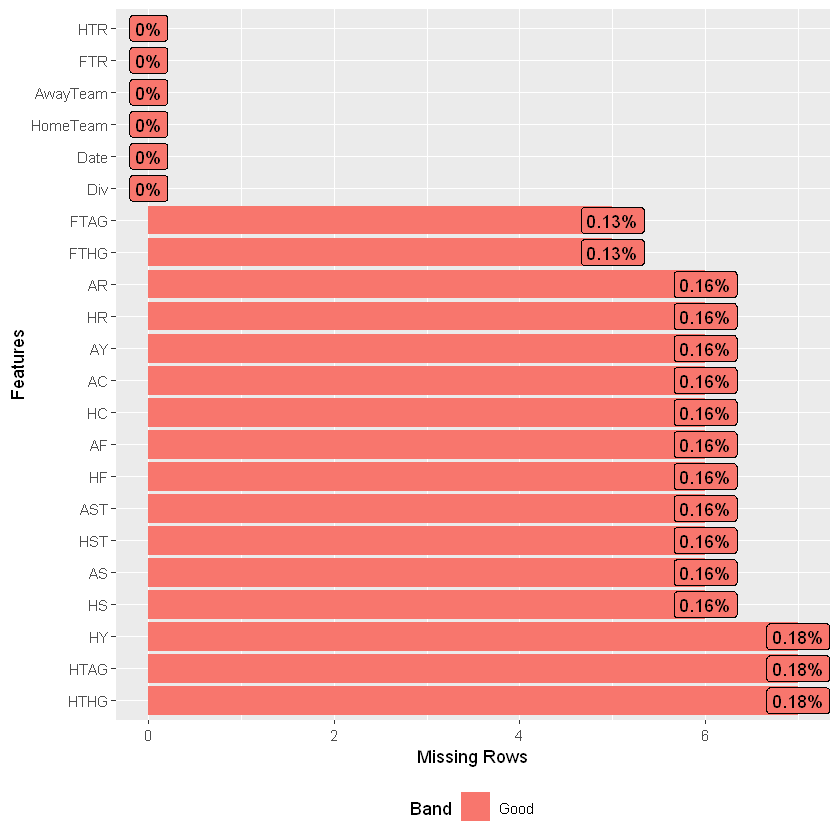

In [11]:
plot_missing(Dataset)

In [12]:
#isolating the missing values
new_DF <- Dataset[rowSums(is.na(Dataset)) > 0,]


In [13]:
new_DF

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,⋯,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1175,I1,23/09/12,Cagliari,Roma,0,3,A,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1521,,,,,NA,NA,,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1522,,,,,NA,NA,,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1523,,,,,NA,NA,,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2151,I1,02/03/15,Roma,Juventus,1,1,D,0,0,D,⋯,3,1,11,16,1,5,NA,5,1,0
2284,,,,,NA,NA,,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2665,,,,,NA,NA,,NA,NA,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2683,I1,28/08/16,Sassuolo,Pescara,0,3,A,NA,NA,,⋯,3,5,12,21,2,7,2,2,0,0


Using the R package “Data Explorer,” it has been found that the dataset has eight observations with missing values. At this stage, it has been decided to drop this group of observations. Indeed, considering that football is unpredictable, we can’t replace values with their average. And some of the rows were missing the teams who played the matches. In addition, all the columns related to Bet agencies have been dropped because they are not relevant to the final purpose of this study.

In [14]:
# in this case we have opted to remove the rows with missing values
Dataset=Dataset[-c(1175,1521:1523,  2151, 2284, 2665,2683), ]

In [15]:
# removing also the data that refer to the half time, not relevant for the scope of this project
Dataset = subset(Dataset, select = -c(8:10) )

In [16]:
nrow(Dataset)

[1] 3797

In [17]:
head(Dataset)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,I1,2009-08-22,Bologna,Fiorentina,1,1,D,6,17,4,5,17,20,4,9,1,1,0,0
2,I1,2009-08-22,Siena,Milan,1,2,A,15,13,4,5,22,11,5,8,2,1,0,0
3,I1,2009-08-23,Catania,Sampdoria,1,2,A,8,8,4,4,29,13,11,4,4,2,1,0
4,I1,2009-08-23,Genoa,Roma,3,2,H,14,11,7,6,20,13,8,5,5,2,0,0
5,I1,2009-08-23,Inter,Bari,1,1,D,20,13,3,4,20,14,10,1,3,2,0,0
6,I1,2009-08-23,Juventus,Chievo,1,0,H,14,6,2,0,15,14,9,2,3,2,0,0


The current version of the Dataset has the following attributes: 
FTHG: Home Goals
FTAG: Away Goals
FTR: H= Home Win; A= Away Win; D=Draw
HS: Home Shoots
AS: Away Shoots
HST: Home Shoots on Target
AST: Away Shoots on Target
HF: Home Faul
AF: Away Faul
HC: Home Corner
AC: Away Corner
HY: Home Yellow Card
AY: Away Yellow Card
HR: Home Red Card
AR: Away Red Card

# Preprocessing


From the original dataset, it is impossible to apply the Cluster algorithm because we have data for each match but not for each team. The preprocessing phase aims to isolate data for each club either as "Home Team" or "Away Team". Then, the two lists are merged to get a new dataset.
The raw version of the dataset has yet to be ready for the algorithm application because each observation is related, at the same time, to Home Team and Away Team. Consequently, we have adopted two techniques: First, We have to consider that all the data related to the opponent team represent a performance the other team has suffered. Consequently, for each match disputed, the author has retrieved data from the opponent team that has been converted to negative as performance suffered (such as goal conceded, shots conceded, corners conceded, etc.). After the application of this technique, the author had two data frames related to each team, Home Team, and Away Team, that have been merged. With the second technique, the author grouped the data based on every single team so that, in the end, he had a short dataset with the performance of each Italian Team in 10 years of matches played that consider also the performance suffered.

## Unique Teams
This session is to understand the teams that played at least one game in the Italian Serie A and then to count the total matches played by each.

In [18]:
unique(Dataset$HomeTeam)

[1] "Bologna"    "Siena"      "Catania"    "Genoa"      "Inter"     
 [6] "Juventus"   "Lazio"      "Livorno"    "Palermo"    "Udinese"   
[11] "Bari"       "Milan"      "Atalanta"   "Cagliari"   "Chievo"    
[16] "Fiorentina" "Napoli"     "Parma"      "Roma"       "Sampdoria" 
[21] "Cesena"     "Brescia"    "Lecce"      "Novara"     "Pescara"   
[26] "Torino"     "Verona"     "Sassuolo"   "Empoli"     "Frosinone" 
[31] "Carpi"      "Crotone"    "Benevento"  "Spal"

In [19]:
unique(Dataset$AwayTeam)

[1] "Fiorentina" "Milan"      "Sampdoria"  "Roma"       "Bari"      
 [6] "Chievo"     "Atalanta"   "Cagliari"   "Napoli"     "Parma"     
[11] "Bologna"    "Inter"      "Genoa"      "Siena"      "Lazio"     
[16] "Palermo"    "Livorno"    "Catania"    "Juventus"   "Udinese"   
[21] "Cesena"     "Lecce"      "Brescia"    "Novara"     "Torino"    
[26] "Pescara"    "Sassuolo"   "Verona"     "Empoli"     "Carpi"     
[31] "Frosinone"  "Crotone"    "Spal"       "Benevento"

In [20]:
# number of games Home
sort(table(Dataset$HomeTeam), decreasing=TRUE)


    Chievo Fiorentina      Genoa      Inter   Juventus      Lazio      Milan 
       190        190        190        190        190        190        190 
    Napoli    Udinese       Roma   Atalanta    Bologna  Sampdoria   Cagliari 
       190        190        189        171        171        171        170 
   Palermo      Parma     Torino   Sassuolo    Catania     Empoli     Verona 
       133        133        133        113         95         76         76 
    Cesena      Siena       Bari    Crotone  Frosinone      Lecce    Livorno 
        57         57         38         38         38         38         38 
   Pescara       Spal  Benevento    Brescia      Carpi     Novara 
        38         38         19         19         19         19 

In [21]:
# number of games Away
sort(table(Dataset$AwayTeam), decreasing=TRUE)


    Chievo Fiorentina      Genoa      Inter      Lazio      Milan     Napoli 
       190        190        190        190        190        190        190 
   Udinese   Juventus       Roma   Atalanta    Bologna   Cagliari  Sampdoria 
       190        189        189        171        171        171        171 
   Palermo      Parma     Torino   Sassuolo    Catania     Empoli     Verona 
       133        133        133        114         95         76         76 
    Cesena      Siena       Bari    Crotone  Frosinone      Lecce    Livorno 
        57         57         38         38         38         38         38 
      Spal    Pescara  Benevento    Brescia      Carpi     Novara 
        38         37         19         19         19         19 

In [22]:
Home=sort(table(Dataset$HomeTeam), decreasing=TRUE)
Away=sort(table(Dataset$AwayTeam), decreasing=TRUE)
TotalMatches=Home+Away
TotalMatches


    Chievo Fiorentina      Genoa      Inter   Juventus      Lazio      Milan 
       380        380        380        380        380        380        380 
    Napoli    Udinese       Roma   Atalanta    Bologna  Sampdoria   Cagliari 
       380        379        378        342        342        342        341 
   Palermo      Parma     Torino   Sassuolo    Catania     Empoli     Verona 
       266        266        266        227        190        152        152 
    Cesena      Siena       Bari    Crotone  Frosinone      Lecce    Livorno 
       114        114         76         76         76         76         76 
   Pescara       Spal  Benevento    Brescia      Carpi     Novara 
        76         75         38         38         38         38 

## Isolating Home Scores
In this session, it will be retrieved data per each team that played at Home. In addition, it will be retrieved goals conceded "FTAG", shots conceded "AS", shots on target conceded "AST", corners conceded "AC", fauls received "AF", yellow cards received "AY", red cards received "AR".
Moreover, goals conceded "FTAG", shots conceded "AS", shots on target conceded "AST", corners conceded "AC",fauls committed, yellow cards and red cards received are negative parameters and so they will be converted into negative numbers.



In [23]:
## ISOLATING THE TEAMS
ListHome <- lapply(Dataset$HomeTeam, unique)
ListAway <- lapply(Dataset$AwayTeam, unique)

In [24]:
Home=Dataset[(Dataset$HomeTeam==c(ListHome)), c("HomeTeam", "FTHG", "FTR", "HS", "HST", "HF", "HC", "HY", "HR", "FTAG", "AS", "AST", "AC", "AF", "AY", "AR")]


In [25]:
# Converting Fauls committed and yellow and red cards received into negative numbers
Home$HF = Home$HF*(-1)
Home$HY = Home$HY*(-1)
Home$HR = Home$HR*(-1)

In [26]:
# Converting goals conceded "FTAG", shots conceded "AS", shots on target conceded "AST", corners conceded "AC" into negative numbers.
Home$FTAG = Home$FTAG*(-1)
Home$AS = Home$AS*(-1)
Home$AST = Home$AST*(-1)
Home$AC = Home$AC*(-1)

In [27]:
nrow(Home)

[1] 3797

In [28]:
head(Home)

,HomeTeam,FTHG,FTR,HS,HST,HF,HC,HY,HR,FTAG,AS,AST,AC,AF,AY,AR
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Bologna,1,D,6,4,-17,4,-1,0,-1,-17,-5,-9,20,1,0
2,Siena,1,A,15,4,-22,5,-2,0,-2,-13,-5,-8,11,1,0
3,Catania,1,A,8,4,-29,11,-4,-1,-2,-8,-4,-4,13,2,0
4,Genoa,3,H,14,7,-20,8,-5,0,-2,-11,-6,-5,13,2,0
5,Inter,1,D,20,3,-20,10,-3,0,-1,-13,-4,-1,14,2,0
6,Juventus,1,H,14,2,-15,9,-3,0,0,-6,0,-2,14,2,0


## Isolating Away Scores
In this session will be retrieved data per each team that played Away. In addition, will be retrieved goals conceded "FTHG", shots conceded "HS", shots on target conceded "HST", corners conceded "HC", fauls received "HF", yellow cards received "HY", red cards received "HR". Moreover, goals conceded "FTHG", shots conceded "HS", shots on target conceded "HST", corners conceded "HC",fauls committed, yellow cards and red cards received are negative parameters and so they will be converted into negative numbers.

In [29]:
Away=Dataset[(Dataset$AwayTeam==c(ListAway)), c("AwayTeam", "FTAG", "FTR", "AS", "AST", "AF", "AC", "AY", "AR", "FTHG", "HS", "HST", "HC", "HF", "HY", "HR")]


In [30]:
# Converting Fauls committed and yellow and red cards received into negative numbers
Away$AF = Away$AF*(-1)
Away$AY = Away$AY*(-1)
Away$AR = Away$AR*(-1)


In [31]:
# Converting goals conceded "FTHG", shots conceded "HS", shots on target conceded "HST", corners conceded "HC" into negative numbers.
Away$FTHG = Away$FTHG*(-1)
Away$HS = Away$HS*(-1)
Away$HST = Away$HST*(-1)
Away$HC = Away$HC*(-1)



In [32]:
nrow(Away)

[1] 3797

In [33]:
head(Away)

,AwayTeam,FTAG,FTR,AS,AST,AF,AC,AY,AR,FTHG,HS,HST,HC,HF,HY,HR
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Fiorentina,1,D,17,5,-20,9,-1,0,-1,-6,-4,-4,17,1,0
2,Milan,2,A,13,5,-11,8,-1,0,-1,-15,-4,-5,22,2,0
3,Sampdoria,2,A,8,4,-13,4,-2,0,-1,-8,-4,-11,29,4,1
4,Roma,2,H,11,6,-13,5,-2,0,-3,-14,-7,-8,20,5,0
5,Bari,1,D,13,4,-14,1,-2,0,-1,-20,-3,-10,20,3,0
6,Chievo,0,H,6,0,-14,2,-2,0,-1,-14,-2,-9,15,3,0


## Combine Home and Away scores in one dataset


In [34]:
#giving the same name to the columns
colnames(Home) <- c('Team','Goal', 'Results', 'Shots', 'Shots_on_Target', 'Faults', 'Corners','Y_Card', 'R_Card', 'Goals_Suffered', 'Shots_Suffered', 'Shots_on_Target_Suffered', 'Corners_Suffered', 'Fauls_Suffered', 'YC_Suffered', 'RC_Suffered')
colnames(Away) <- c('Team','Goal', 'Results', 'Shots', 'Shots_on_Target', 'Faults', 'Corners','Y_Card', 'R_Card', 'Goals_Suffered', 'Shots_Suffered', 'Shots_on_Target_Suffered', 'Corners_Suffered', 'Fauls_Suffered', 'YC_Suffered', 'RC_Suffered')


In [35]:
# Combine the dataset
DatasetCombined <- rbind(Home, Away)

In [36]:
nrow(DatasetCombined)

[1] 7594

## Converting the final result into points

In [37]:
# giving a score of 5 for victories away, 3 for victories home, 1 for draw
DatasetCombined$Results<-replace(DatasetCombined$Results, DatasetCombined$Results=='A', 5)
DatasetCombined$Results<-replace(DatasetCombined$Results, DatasetCombined$Results=='H', 3)
DatasetCombined$Results<-replace(DatasetCombined$Results, DatasetCombined$Results=='D', 1)
DatasetCombined$Results=as.integer(DatasetCombined$Results)

In [38]:
head(DatasetCombined)

,Team,Goal,Results,Shots,Shots_on_Target,Faults,Corners,Y_Card,R_Card,Goals_Suffered,Shots_Suffered,Shots_on_Target_Suffered,Corners_Suffered,Fauls_Suffered,YC_Suffered,RC_Suffered
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Bologna,1,1,6,4,-17,4,-1,0,-1,-17,-5,-9,20,1,0
2,Siena,1,5,15,4,-22,5,-2,0,-2,-13,-5,-8,11,1,0
3,Catania,1,5,8,4,-29,11,-4,-1,-2,-8,-4,-4,13,2,0
4,Genoa,3,3,14,7,-20,8,-5,0,-2,-11,-6,-5,13,2,0
5,Inter,1,1,20,3,-20,10,-3,0,-1,-13,-4,-1,14,2,0
6,Juventus,1,3,14,2,-15,9,-3,0,0,-6,0,-2,14,2,0


## Aggregating data per team based on variables

In [39]:
Goal=aggregate(x= DatasetCombined$Goal,
          by= list(DatasetCombined$Team),
          FUN=sum)
Results=aggregate(x= DatasetCombined$Results,
          by= list(DatasetCombined$Team),
          FUN=sum)
Shots=aggregate(x= DatasetCombined$Shots,
          by= list(DatasetCombined$Team),
          FUN=sum)
Shots_on_Target=aggregate(x= DatasetCombined$Shots_on_Target,
          by= list(DatasetCombined$Team),
          FUN=sum)
Faults=aggregate(x= DatasetCombined$Faults,
          by= list(DatasetCombined$Team),
          FUN=sum)
Corners=aggregate(x= DatasetCombined$Corners,
          by= list(DatasetCombined$Team),
          FUN=sum)
Y_Card=aggregate(x= DatasetCombined$Y_Card,
          by= list(DatasetCombined$Team),
          FUN=sum)
R_Card=aggregate(x= DatasetCombined$R_Card,
          by= list(DatasetCombined$Team),
          FUN=sum)
Goals_Suffered=aggregate(x= DatasetCombined$Goals_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
Shots_Suffered=aggregate(x= DatasetCombined$Shots_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
Shots_on_Target_Suffered=aggregate(x= DatasetCombined$Shots_on_Target_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
Corners_Suffered=aggregate(x= DatasetCombined$Corners_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
Fauls_Suffered=aggregate(x= DatasetCombined$Fauls_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
YC_Suffered=aggregate(x= DatasetCombined$YC_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)
RC_Suffered=aggregate(x= DatasetCombined$RC_Suffered,
          by= list(DatasetCombined$Team),
          FUN=sum)

In [40]:
#example
head(Goal)

,Group.1,x
,<chr>,<int>
1,Atalanta,435
2,Bari,76
3,Benevento,33
4,Bologna,353
5,Brescia,34
6,Cagliari,386


## Creating a new Dataframe with aggregated scores per team and variables

In [41]:
#create a new dataframe
#put all data frames into list
GroupedDataset <- list(Goal, Results, Shots, Shots_on_Target, Faults, Corners, Y_Card, R_Card, Goals_Suffered, Shots_Suffered, Shots_on_Target_Suffered, Corners_Suffered, Fauls_Suffered, YC_Suffered, RC_Suffered)
#merge all data frames in list
GroupedDataset=GroupedDataset %>% reduce(full_join, by='Group.1')
# assign column names 
colnames(GroupedDataset) <- c('Team', 'Goal',  'Results', 'Shots', 'Shots_on_Target', 'Faults', 'Corners','Y_Card', 'R_Card', 'Goals_Suffered', 'Shots_Suffered', 'Shots_on_Target_Suffered', 'Corners_Suffered', 'Fauls_Suffered', 'YC_Suffered', 'RC_Suffered')

In [42]:
# for the application of the algorithm, it will be assigned rownames to Teams
df <- GroupedDataset %>% remove_rownames %>% column_to_rownames(var="Team")

In [43]:
head(df)

,Goal,Results,Shots,Shots_on_Target,Faults,Corners,Y_Card,R_Card,Goals_Suffered,Shots_Suffered,Shots_on_Target_Suffered,Corners_Suffered,Fauls_Suffered,YC_Suffered,RC_Suffered
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
Atalanta,435,1028,4294,1500,-5117,1844,-800,-63,-433,-4341,-1479,-1783,5325,774,43
Bari,76,228,841,279,-1186,309,-129,-10,-105,-1147,-370,-405,1154,165,11
Benevento,33,134,466,146,-490,165,-78,-7,-84,-561,-213,-203,499,70,2
Bologna,353,1036,3792,1293,-5225,1549,-816,-49,-471,-4572,-1617,-2006,5307,740,53
Brescia,34,110,491,154,-650,180,-93,-5,-52,-591,-196,-203,586,68,4
Cagliari,386,1029,3925,1335,-5461,1604,-836,-54,-519,-4602,-1651,-1872,5228,736,45


In [44]:
str(df)

'data.frame':	34 obs. of  15 variables:
 $ Goal                    : int  435 76 33 353 34 386 37 215 98 356 ...
 $ Results                 : int  1028 228 134 1036 110 1029 114 514 344 1164 ...
 $ Shots                   : int  4294 841 466 3792 491 3925 426 2456 1268 4134 ...
 $ Shots_on_Target         : int  1500 279 146 1293 154 1335 132 752 378 1375 ...
 $ Faults                  : num  -5117 -1186 -490 -5225 -650 ...
 $ Corners                 : int  1844 309 165 1549 180 1604 178 919 515 1655 ...
 $ Y_Card                  : num  -800 -129 -78 -816 -93 -836 -105 -411 -272 -923 ...
 $ R_Card                  : num  -63 -10 -7 -49 -5 -54 -6 -36 -21 -40 ...
 $ Goals_Suffered          : num  -433 -105 -84 -471 -52 -519 -57 -261 -183 -514 ...
 $ Shots_Suffered          : num  -4341 -1147 -561 -4572 -591 ...
 $ Shots_on_Target_Suffered: num  -1479 -370 -213 -1617 -196 ...
 $ Corners_Suffered        : num  -1783 -405 -203 -2006 -203 ...
 $ Fauls_Suffered          : int  5325 1154 499 5

In [45]:
# Scaling dataset
df <- scale(df)

# KMean


The K-means is the unsupervised machine learning algorithm used to group the football teams in clusters based on the 10 years data. The FitKMeans function suggests that 5 would be the ideal number of clusters.  

## Tuning the alghorithm

In [46]:
#Looking for the best number of Clusters
ClusteringNumber <- FitKMeans(df, max.clusters=20, nstart=20, seed=278613)


In [47]:
ClusteringNumber

Clusters,Hartigan,AddCluster
<int>,<dbl>,<lgl>
2,165.4516164,TRUE
3,23.3548787,TRUE
4,12.4139732,TRUE
5,16.6913251,TRUE
6,6.8337616,FALSE
7,6.9299904,FALSE
8,4.0681769,FALSE
9,4.4280613,FALSE
10,3.7243321,FALSE


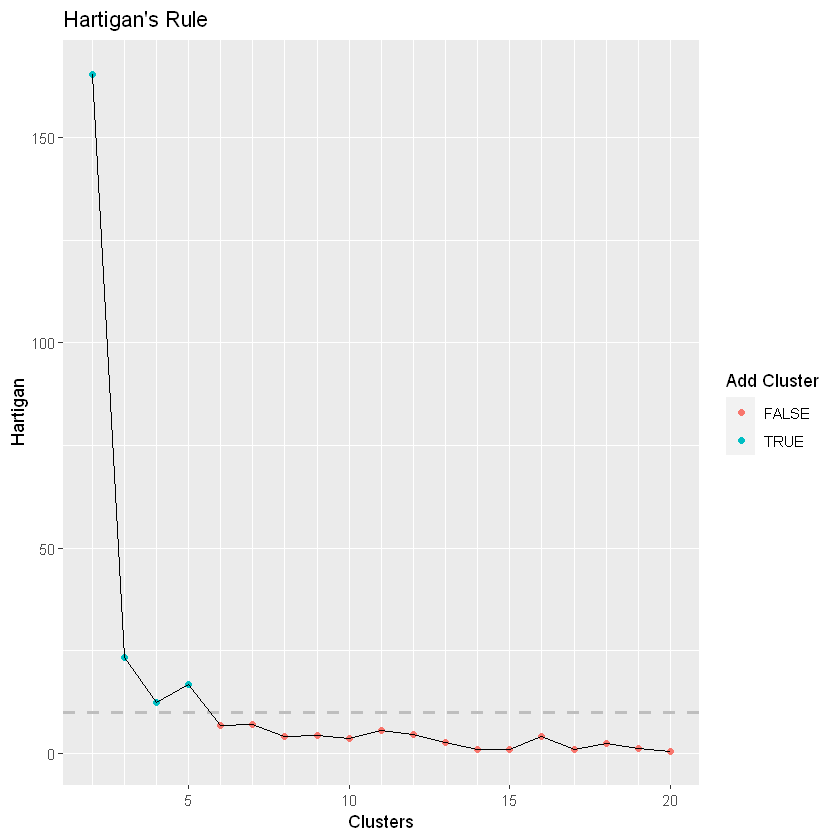

In [48]:
#Plot the best number of cluster
PlotHartigan(ClusteringNumber)

In [49]:
# output to be present as PNG file
png(file = "KMeansExample.png")


## Algorithm Application

In [50]:
# Lunch algorithm with 5 Clusters
km <- kmeans(df, centers = 5, nstart = 5000)

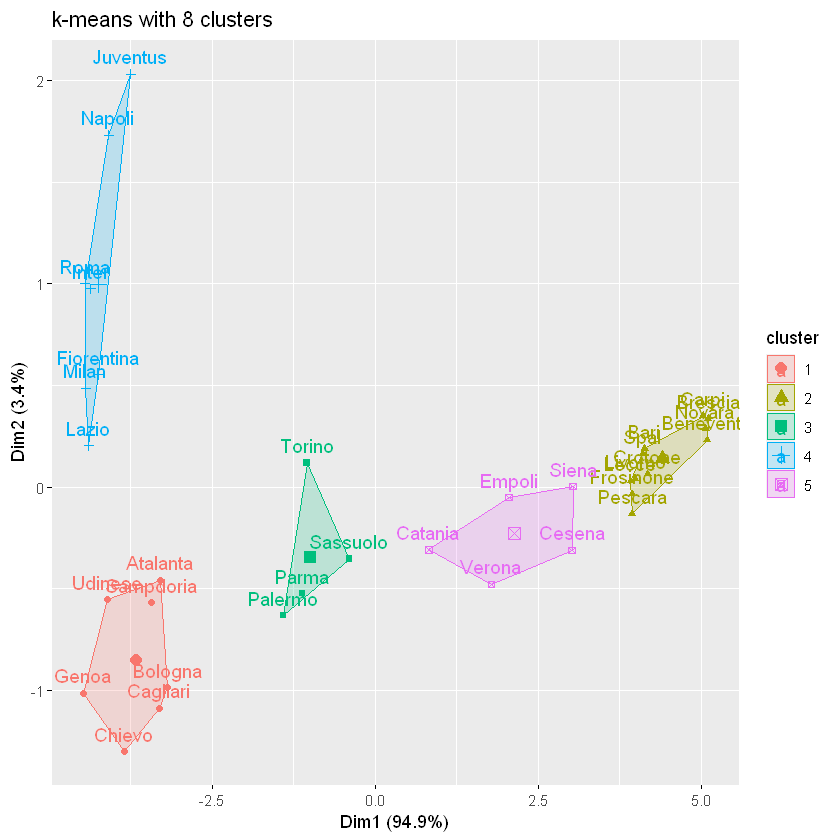

In [51]:
# Visualize the clusters
fviz_cluster(km, data = df, main = "k-means with 8 clusters")

In [52]:
# saving the file
dev.off()

png 
  3

In [53]:
# Which Cluster teams belong to
table(GroupedDataset$Team, km$cluster)

            
             1 2 3 4 5
  Atalanta   1 0 0 0 0
  Bari       0 1 0 0 0
  Benevento  0 1 0 0 0
  Bologna    1 0 0 0 0
  Brescia    0 1 0 0 0
  Cagliari   1 0 0 0 0
  Carpi      0 1 0 0 0
  Catania    0 0 0 0 1
  Cesena     0 0 0 0 1
  Chievo     1 0 0 0 0
  Crotone    0 1 0 0 0
  Empoli     0 0 0 0 1
  Fiorentina 0 0 0 1 0
  Frosinone  0 1 0 0 0
  Genoa      1 0 0 0 0
  Inter      0 0 0 1 0
  Juventus   0 0 0 1 0
  Lazio      0 0 0 1 0
  Lecce      0 1 0 0 0
  Livorno    0 1 0 0 0
  Milan      0 0 0 1 0
  Napoli     0 0 0 1 0
  Novara     0 1 0 0 0
  Palermo    0 0 1 0 0
  Parma      0 0 1 0 0
  Pescara    0 1 0 0 0
  Roma       0 0 0 1 0
  Sampdoria  1 0 0 0 0
  Sassuolo   0 0 1 0 0
  Siena      0 0 0 0 1
  Spal       0 1 0 0 0
  Torino     0 0 1 0 0
  Udinese    1 0 0 0 0
  Verona     0 0 0 0 1

# Conclusions

This study wants to answer the research question: “Following the matches played in the past ten years, by using the KMeans, what are the Clusters that can group similar teams?”. The tuning phase has suggested splitting the dataset into 5 clusters that can be identified as follow:
- Cluster 1 – Europe: Juventus, Napoli, Roma, Inter, Milan, Fiorentina, Lazio. This group of teams is the most competitive in Serie A and fights yearly to access the European cups. 
- Cluster 2 – Usually Middle Rank: Atalanta, Sampdoria, Udinese, Genoa, Bologna, Cagliari, Chievo. This group of teams is not very competitive but can boast a few appearances in European cups. 
- Cluster 3 – Usually Middle Rank: Torino, Sassuolo, Parma, Palermo. This group of teams usually achieves quiet salvation.
- Cluster 4 – Competing to survive: Catania, Empoli, Verona, Siena, Cesena. This group of teams usually fights not to be relegated to Serie B and earn their stays in Serie A with the last games of the championship. 
- Cluster 5 – One-off presence in Serie A: Pescara, Frosinone, Crotone, Bari, Spal, Livorno, Lecce, Benevento, Novara, Carpi, Brescia. This group of teams has sporadic appearances in Serie A, which usually ends in one year, and then moves on to Serie B.

These groups identify the competitiveness of the Italian Serie A pretty well.

